# Darījumi ar zemes īpašumiem Latvijas teritorijā

Izmantojot VZD atvērtos datus par reģistrētiem darījumi ar nekustamo īpašumu veikšu sekojošu:
1. Atlasot vairākkārt pārdotus zemes īpašumus, noskaidrot kuriem no tiem bija lielākas cenu izmaiņas 
2. Atspoguļot Latvijas kartē teritorijas, kurās tika pārdotas visvairāk hektāru zemes

\
Dati pieejami šeit: https://data.gov.lv/dati/lv/dataset/nekustama-ipasuma-tirgus-datu-bazes-atvertie-dati

Jāmin, ka darījumi ir apkopoti pēc to reģistrācijas datumiem nevis kad šie darījumi ir notikuši, kas var būt dažādos gados.

Apskatīšu neapbūvētās zemes un zemes, kas nav sadalītas vairākās daļās, datus par 2023. gadu.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import contextily as cx

### Ielādēju csv datus
Norādot: 
- ka atdalītais šeit ir semikols, 
- ka kolonna ar kadastra numuriem ir 'string' datu tips (savādāk pēc noklusējuma kolonna ielasītos kā numuri un kadastra numuri var sākties ar nulli, kas pazustu),
- un datuma kolonnu.

In [2]:
df = pd.read_csv('nitis_csv_2023/ZV_CSV_2023.csv', 
                 sep=';', 
                 dtype={'Īpašuma kadastra numurs': 'str'}, 
                 parse_dates=[9], dayfirst=True)

In [3]:
# lai būtu redzamas visas kolonnas un noapaļojums būtu līdz diviem cipariem aiz komata
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.head(3)

,Darījumu skaits atlasē,Darījuma ID,Īpašuma kadastra numurs,Adreses pieraksts,Novads,Pilsēta,Pagasts,NĪLM (lielākais pēc platības),NĪLM kodi(saraksts),Darījuma datums,"Darījuma summa, EUR",Zemes vienību skaits,Zemes vienību kadastra apzīmējumu saraksts (viena darījuma ietvaros),Vai zeme ir apbūvēta (0-nav/1-ir),"Pārdotā zemes kopplatība, m2","Pārdotā lauksaimniecības zemes platība, m2","Pārdotā aramzemes platība, m2","Pārdotā augļu dārzu platība, m2","Pārdotā pļavu platība, m2","Pārdotā ganību platība, m2","Pārdotā meliorētās LIZ platība, m2","Pārdotā mežu zemes platība, m2","Pārdotā krūmāju platība, m2","Pārdotā purvu platība, m2","Pārdotā zemes zem ūdeņiem platība, m2","Pārdotā zemes zem dīķiem platība, m2","Pārdotā zemes zem ēkām un pagalmiem platība, m2","Pārdotā zemes zem ceļiem platība, m2","Pārdotā pārējās zemes platība, m2",Zemes daļas (skaitītājs),Zemes daļas (saucējs)
0,17463,1119667,80110041188,"Nometņu iela 44, Salaspils, Salaspils nov., LV...",Salaspils nov.,Salaspils,NaN,601,601(1710),2021-01-13,907.00,1,80110041188,1,60.28,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.28,68,1929
1,17463,1119668,80760080056,"Mārupes pag., Mārupes nov.",Mārupes nov.,NaN,Mārupes pag.,601,601(10000),2022-01-13,115000.00,1,80760080056,0,5000.00,4900.00,NaN,NaN,4900.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,1,2
2,17463,1119670,01000802091,"Anniņmuižas bulvāris 38, Rīga, LV-1067",NaN,Rīga,NaN,704,704(22541),2022-10-30,2000.00,1,01000802091,1,13.06,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.06,98,169185


In [4]:
# izņemu no apskata apbūvētas zemes un vairāku daļu zemes

df = df[(df['Vai zeme ir apbūvēta (0-nav/1-ir)'] == False) & 
  (df['Zemes daļas (saucējs)'] == 1)]\
.sort_values(by='Darījuma summa, EUR', ascending=False).reset_index(drop=True)

In [5]:
# un izņemu ārā liekas kolonnas
df = df.iloc[:, [2, 4, 5, 6, 9, 10, 14]]

df.head(3)

,Īpašuma kadastra numurs,Novads,Pilsēta,Pagasts,Darījuma datums,"Darījuma summa, EUR","Pārdotā zemes kopplatība, m2"
0,01000922564,NaN,Rīga,NaN,2023-10-03,8000000.00,36017.00
1,80960021860,Ropažu nov.,NaN,Stopiņu pag.,2022-05-10,3715000.00,74314.00
2,01000922543,NaN,Rīga,NaN,2023-01-31,2430604.00,32846.00


In [6]:
# apskatu datiem tipus
df.dtypes

Īpašuma kadastra numurs                 object
Novads                                  object
Pilsēta                                 object
Pagasts                                 object
Darījuma datums                 datetime64[ns]
Darījuma summa, EUR                    float64
Pārdotā zemes kopplatība, m2           float64
dtype: object

### Teritoriāls iedalījums
apvienošu sadalījumu uz pilsētām un pagastiem vienotā teritoriālā sadalījumā

In [8]:
# sākumā piekoriģēšu vienādos pagastu nosaukumus
# tos sameklēju grupējot pēc novada un pēc pagasta (pilsēta šeit nav būtiska)

pag = df.groupby(['Novads', 'Pagasts'])['Pilsēta'].first().reset_index()
pag.loc[pag['Pagasts'].duplicated(keep=False)]

,Novads,Pagasts,Pilsēta
10,Aizkraukles nov.,Pilskalnes pag.,None
48,Augšdaugavas nov.,Pilskalnes pag.,None
202,Jēkabpils nov.,Salas pag.,None
314,Mārupes nov.,Salas pag.,None


In [9]:
# pielieku šiem pagastu nosaukumiem 1 - 2 burtus no novada, lai visi pagastu nosaukumi būtu unikāli

df.loc[(df['Novads'] == 'Aizkraukles nov.') & (df['Pagasts'] == 'Pilskalnes pag.'), 
       'Pagasts'] = 'Pilskalnes pag., AK'
df.loc[(df['Novads'] == 'Augšdaugavas nov.') & (df['Pagasts'] == 'Pilskalnes pag.'), 
       'Pagasts'] = 'Pilskalnes pag., AD'

df.loc[(df['Novads'] == 'Jēkabpils nov.') & (df['Pagasts'] == 'Salas pag.'), 
       'Pagasts'] = 'Salas pag., J'
df.loc[(df['Novads'] == 'Mārupes nov.') & (df['Pagasts'] == 'Salas pag.'), 
       'Pagasts'] = 'Salas pag., M'

In [10]:
# tālāk izveidoju kolonnu ar teritorijas nosaukumu, kurā norādu pilsētu vai pagastu
df['Teritorija'] = df['Pagasts'].fillna(df['Pilsēta'])

In [11]:
# izņemu ārā liekas kolonnas
df = df.drop(['Novads', 'Pilsēta', 'Pagasts'], axis=1)

df.head(3)

,Īpašuma kadastra numurs,Darījuma datums,"Darījuma summa, EUR","Pārdotā zemes kopplatība, m2",Teritorija
0,01000922564,2023-10-03,8000000.00,36017.00,Rīga
1,80960021860,2022-05-10,3715000.00,74314.00,Stopiņu pag.
2,01000922543,2023-01-31,2430604.00,32846.00,Rīga


### 1. Atlasu vairākkārt pārdotus zemes īpašumus un noskaidroju kuriem bija lielākas cenu izmaiņas

In [12]:
# atlasu un izkārtoju pēc kad. numura un tad pēc datuma

vpi = df.loc[df.duplicated(subset=['Īpašuma kadastra numurs'], keep=False)]\
    .sort_values(['Īpašuma kadastra numurs', 'Darījuma datums'])

vpi.head(3)

,Īpašuma kadastra numurs,Darījuma datums,"Darījuma summa, EUR","Pārdotā zemes kopplatība, m2",Teritorija
8111,01000522007,2012-04-02,6397.23,1203.00,Rīga
614,01000522007,2023-03-08,110000.00,1203.00,Rīga
3449,01000670320,2023-02-06,29000.00,2137.00,Rīga


Sagrupēšu pēc īpašuma kadastra numura un noskaidrošu katram īpašumam zemāko un augstāko darījuma summas, kā arī to starpību. Ņemot vērā, ka vienā īpašumā var būt vairākas zemes, un starp darījumiem zemes var būt pārdalītas, izņemšu ārā īpašumus, kuriem mainās kopplatības.

In [13]:
# grupēju pēc kad. numura un agregēju

gr_vpi = vpi.groupby('Īpašuma kadastra numurs')\
    .agg({'Darījuma summa, EUR': ['min', 'max', np.ptp], 'Pārdotā zemes kopplatība, m2': np.ptp})

gr_vpi.head(3)

Darījuma summa, EUR                      \
                                        min       max       ptp   
Īpašuma kadastra numurs                                           
01000522007                         6397.23 110000.00 103602.77   
01000670320                        29000.00  95000.00  66000.00   
01000732125                        10485.00  55000.00  44515.00   

                        Pārdotā zemes kopplatība, m2  
                                                 ptp  
Īpašuma kadastra numurs                               
01000522007                                     0.00  
01000670320                                     0.00  
01000732125                                     0.00

In [14]:
# pārveidoju kolonnas uz 1-līmeņa indeksāciju
gr_vpi.columns = gr_vpi.columns.get_level_values(0) + ', ' +  gr_vpi.columns.get_level_values(1)
gr_vpi.head(3)

,"Darījuma summa, EUR, min","Darījuma summa, EUR, max","Darījuma summa, EUR, ptp","Pārdotā zemes kopplatība, m2, ptp"
Īpašuma kadastra numurs,,,,
01000522007,6397.23,110000.00,103602.77,0.00
01000670320,29000.00,95000.00,66000.00,0.00
01000732125,10485.00,55000.00,44515.00,0.00


In [15]:
# atstāju īpašumus, kur ir izmaiņas darījuma summā, bet zemes platība paliek nemainīga
gr_vpi = gr_vpi.loc[(gr_vpi['Pārdotā zemes kopplatība, m2, ptp'] == 0) & 
                    (gr_vpi['Darījuma summa, EUR, ptp'] != 0)]

# izņemu ārā liekas kolonnas un sakārtoju pēc lielākām izmaiņām darījuma summās
gr_vpi = gr_vpi.drop('Pārdotā zemes kopplatība, m2, ptp', axis=1)\
    .sort_values(by='Darījuma summa, EUR, ptp', ascending=False)

In [16]:
# atlasu top 10 īpašumus, kur ir vislielākās izmaiņas darījumu summās
gr_vpi.head(10)

,"Darījuma summa, EUR, min","Darījuma summa, EUR, max","Darījuma summa, EUR, ptp"
Īpašuma kadastra numurs,,,
80840090005,57500.00,394800.00,337300.00
80800080545,16000.00,288000.00,272000.00
76740060007,9828.00,238000.00,228172.00
88780031295,14000.00,238000.00,224000.00
66800010673,30000.00,225000.00,195000.00
42680040033,13215.00,198000.00,184785.00
42720040277,30000.00,210000.00,180000.00
36880050289,10262.00,189500.00,179238.00
74520080097,5000.00,180698.29,175698.29


### 2. Atspoguļot Latvijas kartē teritorijas, kurās tika pārdotas visvairāk hektāru zemes

Izmantošu pilsētu un pagastu robežu poligoniem no Adrešu reģistra telpiskiem datiem:
https://data.gov.lv/dati/lv/dataset/valsts-adresu-registra-informacijas-sistemas-atvertie-dati/resource/f539e8df-d4e4-4fc1-9f94-d25b662a4c38

In [17]:
# ielādēju shp failus

pilsetas = geopandas.read_file('aw_shp/Pilsetas.shp')
pagasti = geopandas.read_file('aw_shp/Pagasti.shp')

In [18]:
pagasti.head(3)

,KODS,TIPS_CD,NOSAUKUMS,VKUR_CD,VKUR_TIPS,APSTIPR,APST_PAK,STATUSS,SORT_NOS,DAT_SAK,DAT_MOD,DAT_BEIG,ATRIB,STD,geometry
0,100010226,105,Annas pag.,100015694,113,Y,252,EKS,Annas pagasts,1999.03.16,30.06.2021 07:12:32,None,0021410,"Annas pag., Alūksnes nov.","POLYGON ((677778.673 359544.452, 677796.232 35..."
1,100011558,105,Svētes pag.,100016534,113,Y,252,EKS,Svētes pagasts,1999.03.16,30.06.2021 07:19:59,None,0030510,"Svētes pag., Jelgavas nov.","POLYGON ((475378.395 261471.963, 475291.506 26..."
2,100014981,105,Zvirgzdenes pag.,100016751,113,Y,252,EKS,Zvirgzdenes pagasts,1999.03.16,30.06.2021 08:50:08,None,0037610,"Zvirgzdenes pag., Ludzas nov.","POLYGON ((722800.509 275684.419, 722800.643 27..."


In [19]:
# šeit arī piekoriģēju vienādos pagastu nosaukumus

pagasti.loc[pagasti['NOSAUKUMS'].duplicated(keep=False)]

,KODS,TIPS_CD,NOSAUKUMS,VKUR_CD,VKUR_TIPS,APSTIPR,APST_PAK,STATUSS,SORT_NOS,DAT_SAK,DAT_MOD,DAT_BEIG,ATRIB,STD,geometry
38,100010113,105,Pilskalnes pag.,100016630,113,Y,252,EKS,Pilskalnes pagasts,1999.03.16,03.08.2022 00:00:00,None,0020500,"Pilskalnes pag., Aizkraukles nov.","POLYGON ((576108.025 234015.920, 576112.143 23..."
109,100014877,105,Salas pag.,100016421,113,Y,252,EKS,Salas pagasts,1999.03.16,30.06.2021 05:32:32,None,0031550,"Salas pag., Jēkabpils nov.","POLYGON ((612730.577 262627.399, 612707.536 26..."
352,100011076,105,Pilskalnes pag.,100016462,113,Y,252,EKS,Pilskalnes pagasts,1999.03.16,30.06.2021 06:12:17,None,0022550,"Pilskalnes pag., Augšdaugavas nov.","POLYGON ((639774.607 202538.172, 639757.420 20..."
386,100013705,105,Salas pag.,100016583,113,Y,252,EKS,Salas pagasts,1999.03.16,30.06.2021 06:40:46,None,0039420,"Salas pag., Mārupes nov.","POLYGON ((481262.272 303239.716, 480998.751 30..."


In [20]:
pagasti.loc[pagasti['STD'] == 'Pilskalnes pag., Aizkraukles nov.', 'NOSAUKUMS'] = 'Pilskalnes pag., AK'
pagasti.loc[pagasti['STD'] == 'Pilskalnes pag., Augšdaugavas nov.', 'NOSAUKUMS'] = 'Pilskalnes pag., AD'

pagasti.loc[pagasti['STD'] == 'Salas pag., Jēkabpils nov.', 'NOSAUKUMS'] = 'Salas pag., J'
pagasti.loc[pagasti['STD'] == 'Salas pag., Mārupes nov.', 'NOSAUKUMS'] = 'Salas pag., M'

In [21]:
# izņemu ārā liekas kolonnas un apvienoju vienā tabulā pilsētas un pagastus

pilsetas = pilsetas.loc[:, ['NOSAUKUMS', 'geometry']]
pagasti = pagasti.loc[:, ['NOSAUKUMS', 'geometry']]

gdf = geopandas.GeoDataFrame(pd.concat([pilsetas, pagasti], ignore_index=True))
gdf.head(3)

,NOSAUKUMS,geometry
0,Rīga,"POLYGON ((514051.994 306069.253, 513976.965 30..."
1,Stende,"POLYGON ((411991.766 333194.665, 411962.070 33..."
2,Alūksne,"POLYGON ((683059.783 366343.909, 683044.385 36..."


#### Atpakaļ pie darījumu datiem

In [22]:
# grupēju darījumus pēc teritorijas un katrai teritorijai summēju platību
# norādot, ka atkārtojošus zemes īpašumi nesummēt 
darījumus ar vienu un to pašu zemes īpašumu skaitu tikai vienu reizi

ter_platiba = df.loc[df['Īpašuma kadastra numurs'].duplicated()]\
    .groupby('Teritorija', as_index=False)['Pārdotā zemes kopplatība, m2'].sum()

# atsevišķā kolonnā uzrādu zemes platību hektāros
ter_platiba['Pārdotā zemes kopplatība, ha'] = ter_platiba['Pārdotā zemes kopplatība, m2'] / 10000

ter_platiba.head(3)

,Teritorija,"Pārdotā zemes kopplatība, m2","Pārdotā zemes kopplatība, ha"
0,Abavas pag.,527000.00,52.70
1,Aglonas pag.,432900.00,43.29
2,Ainažu pag.,323500.00,32.35


#### Apvienoju telpiskos datus ar darījumiem

In [28]:
# apvienoju
geo_ter_platiba = gdf.merge(ter_platiba, left_on='NOSAUKUMS', right_on='Teritorija', how='inner')

# izņemu ārā liekas kolonnas
geo_ter_platiba = geo_ter_platiba.drop(['NOSAUKUMS', 'Pārdotā zemes kopplatība, m2'], axis=1)

In [29]:
# pagasti ar lielākām pārdotam zemes platībām

geo_ter_platiba.sort_values('Pārdotā zemes kopplatība, ha', ascending=False).head(10)

,geometry,Teritorija,"Pārdotā zemes kopplatība, ha"
117,"POLYGON ((746591.848 226614.142, 746572.174 22...",Šķaunes pag.,170.10
48,"POLYGON ((685995.553 333437.759, 686005.300 33...",Rugāju pag.,163.07
349,"POLYGON ((542548.178 372029.666, 542575.716 37...",Limbažu pag.,141.70
87,"POLYGON ((708253.323 310760.407, 708208.648 31...",Tilžas pag.,127.30
123,"POLYGON ((702901.360 271106.164, 702935.732 27...",Audriņu pag.,123.04
96,"POLYGON ((621858.706 241649.928, 621942.711 24...",Zasas pag.,103.00
240,"POLYGON ((721961.860 352452.464, 721997.988 35...",Susāju pag.,97.70
239,"POLYGON ((681366.411 193855.795, 681380.221 19...",Vecsalienas pag.,94.20
303,"POLYGON ((555626.890 366408.319, 555623.398 36...",Umurgas pag.,86.15
82,"POLYGON ((664463.273 259053.444, 664464.373 25...",Saunas pag.,79.10


#### Atspoguļoju informāciju par pagastiem un pilsētām kartē

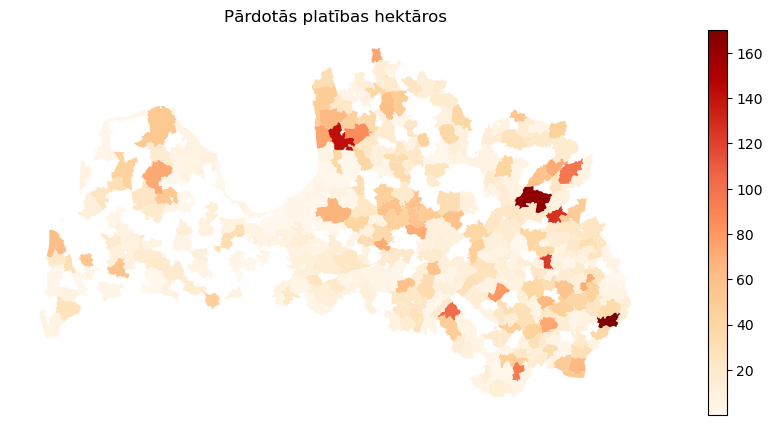

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
geo_ter_platiba.plot(column='Pārdotā zemes kopplatība, ha', legend=True, cmap='OrRd', ax=ax)
ax.axis('off')
plt.title('Pārdotās platības hektāros')

plt.show()